In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('StressLevelDataset.csv')

In [3]:
# Step 3: Prepare features and target
X = df.drop('stress_level', axis=1)
y = df['stress_level']

In [4]:
# Step 4: Initialize and fit Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)  # random_state for reproducibility
rfc.fit(X, y)

RandomForestClassifier(random_state=42)

In [6]:
# Step 5: Extract feature importances
importances = rfc.feature_importances_

In [10]:
# Step 6: Create a DataFrame for importances and sort
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
})
feature_importances = feature_importances.sort_values(by='importance', ascending=False).reset_index(drop=True)

In [8]:
# Step 7: Print the sorted feature importances
print("Sorted Feature Importances:")
print(feature_importances)

Sorted Feature Importances:
                         feature  importance
0                 blood_pressure    0.178220
1                  sleep_quality    0.079069
2                    basic_needs    0.063954
3                         safety    0.063777
4                     depression    0.063207
5                    self_esteem    0.061584
6           academic_performance    0.061436
7         future_career_concerns    0.057073
8                 social_support    0.053195
9                  anxiety_level    0.050663
10    extracurricular_activities    0.044671
11  teacher_student_relationship    0.043384
12                      headache    0.039769
13                      bullying    0.038295
14                 peer_pressure    0.038077
15                   noise_level    0.019888
16                    study_load    0.015498
17             breathing_problem    0.011981
18             living_conditions    0.011208
19         mental_health_history    0.005052


In [21]:
#Top 15 feature for future modeling
top_15_features = feature_importances.head(15)
print(top_15_features)

                         feature  importance
0                 blood_pressure    0.178220
1                  sleep_quality    0.079069
2                    basic_needs    0.063954
3                         safety    0.063777
4                     depression    0.063207
5                    self_esteem    0.061584
6           academic_performance    0.061436
7         future_career_concerns    0.057073
8                 social_support    0.053195
9                  anxiety_level    0.050663
10    extracurricular_activities    0.044671
11  teacher_student_relationship    0.043384
12                      headache    0.039769
13                      bullying    0.038295
14                 peer_pressure    0.038077


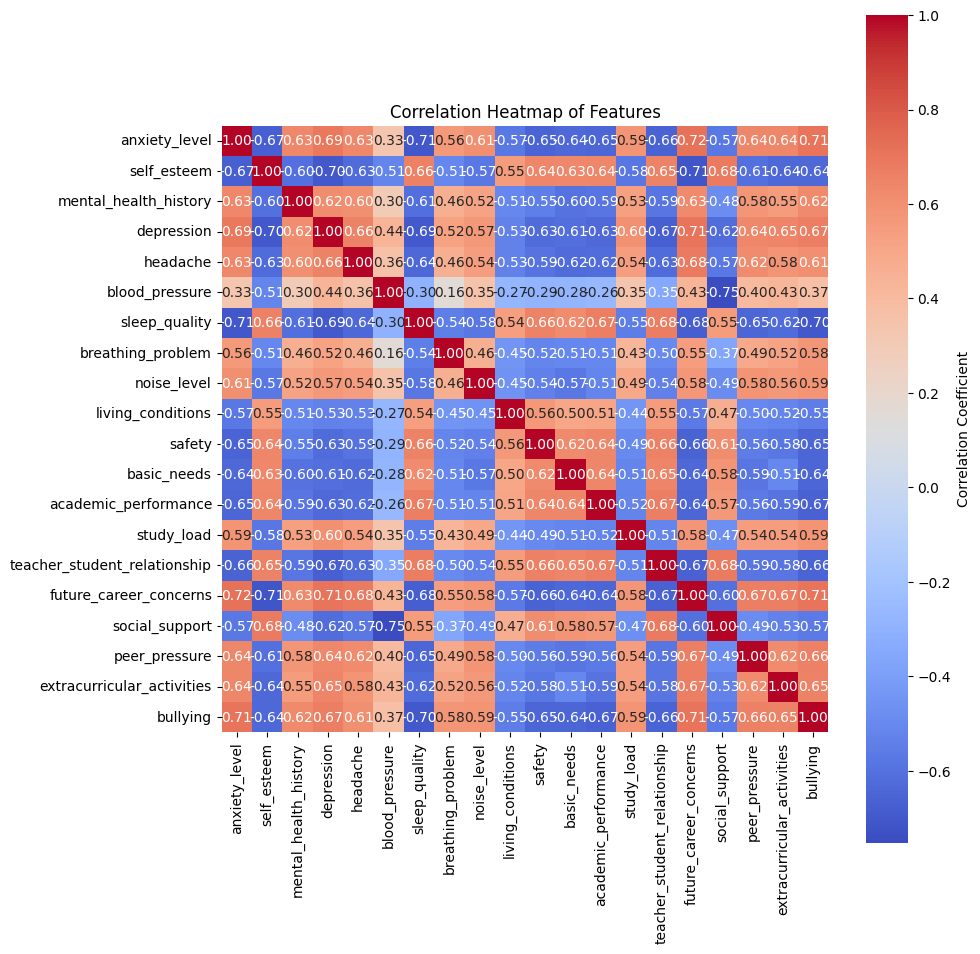

In [22]:
plt.figure(figsize=(10, 10))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.show()


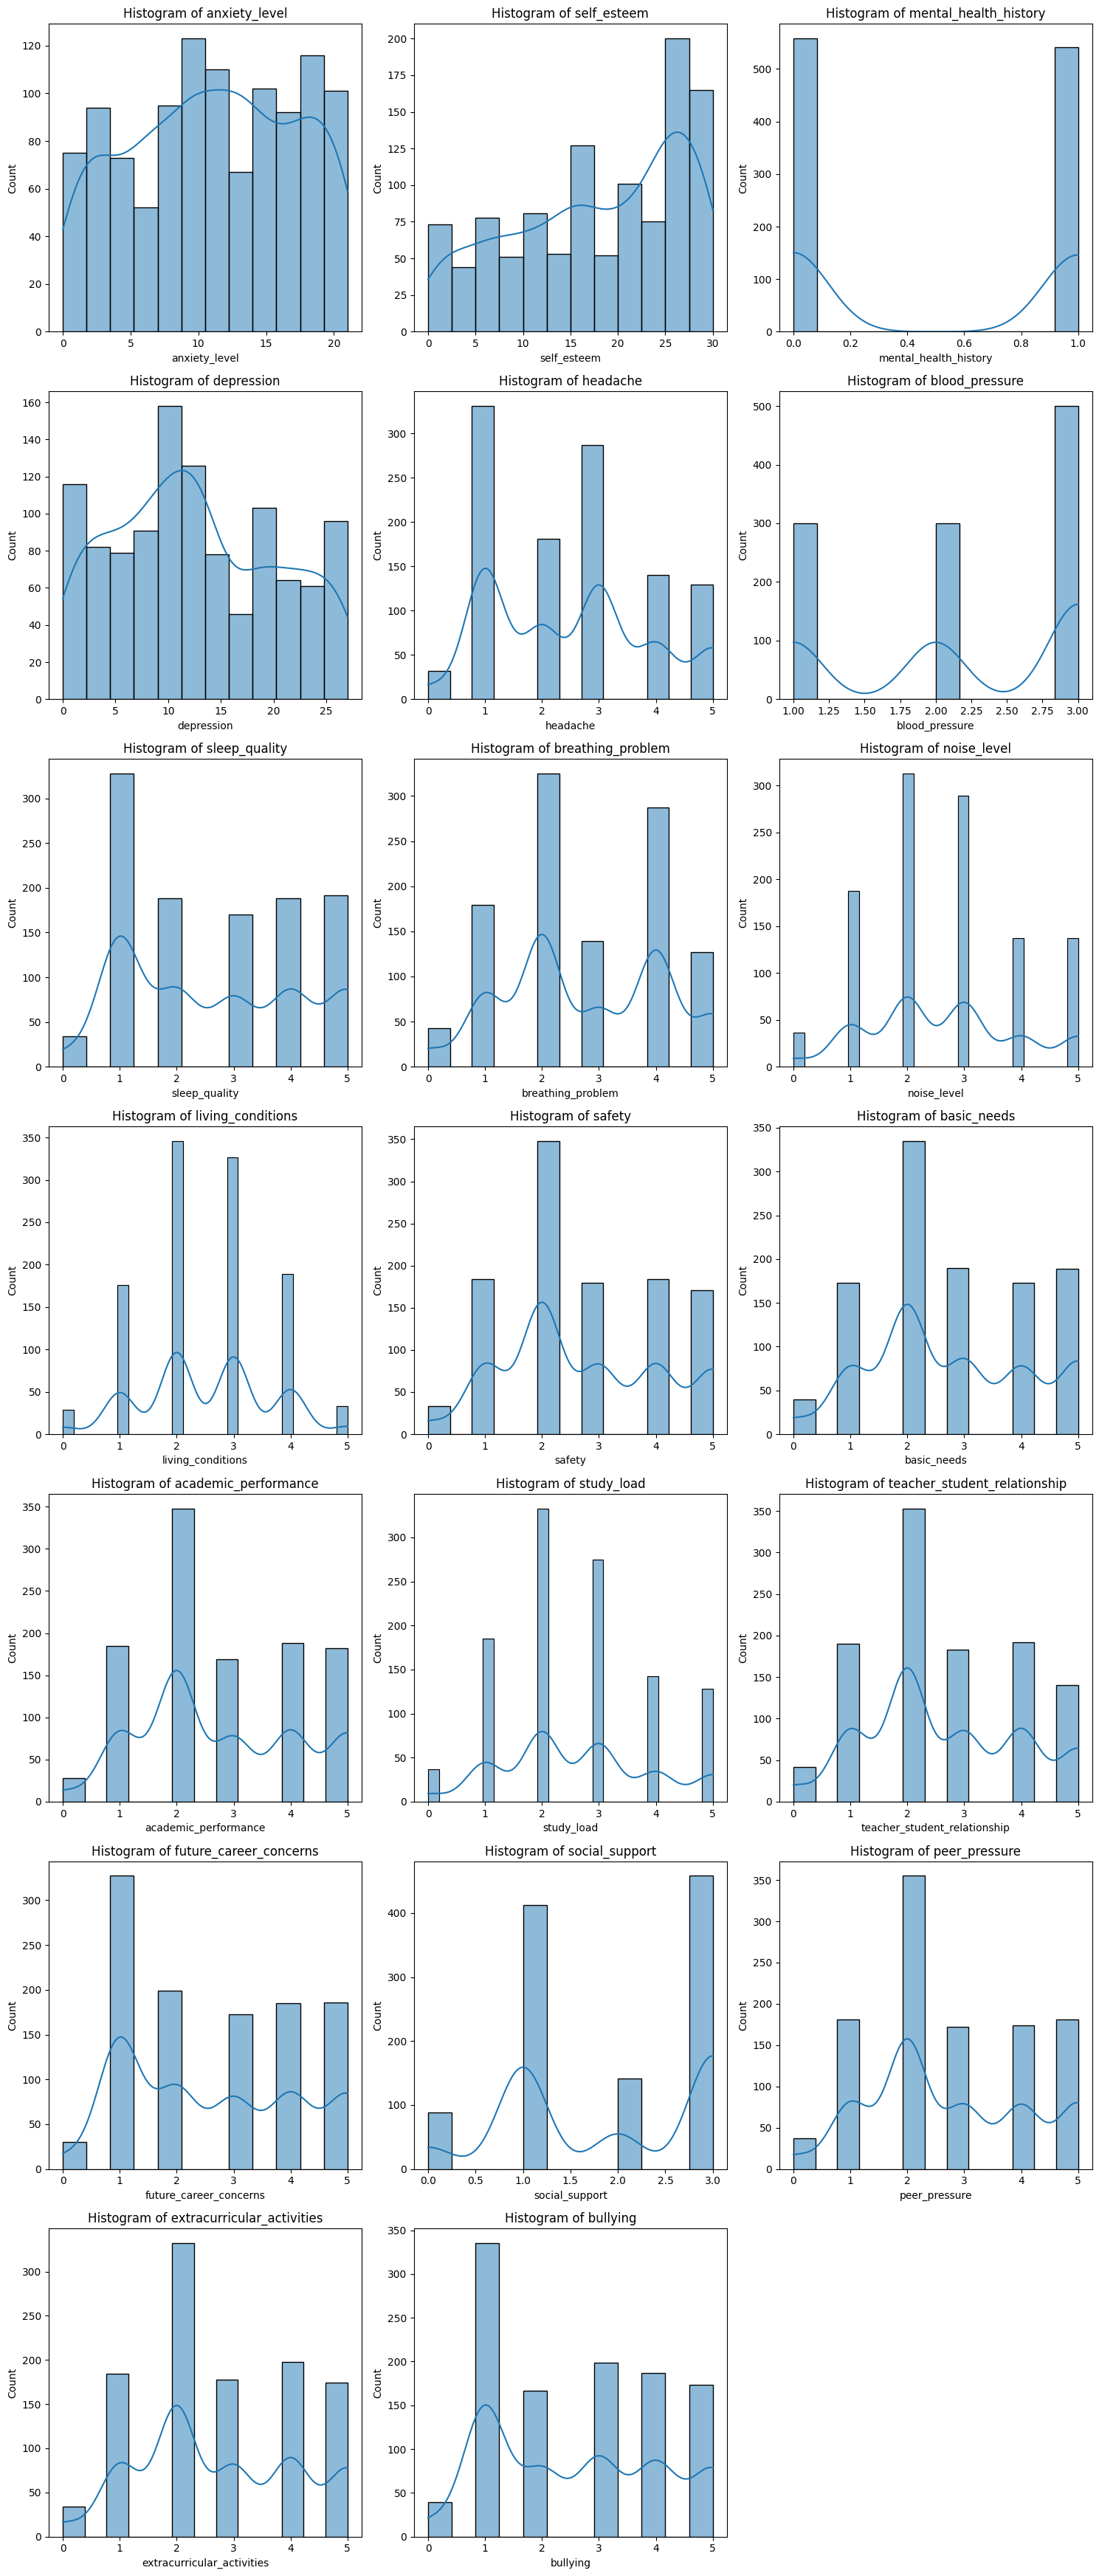

In [20]:
num_features = len(X.columns)
n_cols = 3  # Number of columns in the subplot grid
n_rows = (num_features + n_cols - 1) // n_cols  # Calculate rows needed
plt.figure(figsize=(15, 5 * n_rows))
for i, column in enumerate(X.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(X[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()